In [3]:
import spacy
import en_core_web_sm
import pandas as pd
import spacytextblob.spacytextblob as spacytextblob
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import glob


submissions2 = pd.read_json("/Users/ritikabrahmadesam/Downloads/opiates_submissions2.json")
submissions2 = submissions2


submissions3 = pd.read_json("/Users/ritikabrahmadesam/Downloads/opiates_submissions3.json")
submissions3 = submissions3

df = pd.concat([submissions2, submissions3])

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

nlp.select_pipes(disable = ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner'])

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

## Load data

In [5]:
df = df.loc[(df['selftext'] != '') & (df['selftext'] != '[deleted]') & (df['selftext'] != '[removed]') & (df['author'] != '[deleted]') & (df['selftext'] != 'None')]
df = df.dropna(subset=['selftext']).reset_index(drop=True)
df.reset_index(inplace=True, drop=True)

In [6]:
submissions2['blob'] = submissions2['selftext'].apply(lambda text: nlp(text)._.blob)
submissions2['polarity'] = submissions2['blob'].apply(lambda b: float(b.polarity))
submissions2['subjectivity'] = submissions2['blob'].apply(lambda b: float(b.subjectivity))

submissions3['blob'] = submissions3['selftext'].apply(lambda text: nlp(text)._.blob)
submissions3['polarity'] = submissions3['blob'].apply(lambda b: float(b.polarity))
submissions3['subjectivity'] = submissions3['blob'].apply(lambda b: float(b.subjectivity))

### Bin by Time

In [19]:
submissions2['selftext']

"Got it for .50 cents a mili. Of course these are the OP formula.\n\nDid I get a decent deal? I'm okay with paying 1/2 for a blue but I've never done OP or even the old OCs so I don't know. Time release and all that shit.\n\nUsually two blues or three domes will set me straight (10 mg). Ate the whole pill. Happy new years b /r/opiates"

## Spacy Sentiment Analysis

In [6]:
submissions_polarity = {}
submissions_subjectivity = {}

In [7]:
# This is how happy/sad
display(submissions2['polarity'].describe())
submissions_polarity["submissions1"] = (submissions2['polarity'].describe())

# This is the subjectivity
display(submissions2['subjectivity'].describe())
submissions_subjectivity["submissions1"] = (submissions2['subjectivity'].describe())

count    200.000000
mean       0.073687
std        0.205949
min       -0.600000
25%        0.000000
50%        0.000000
75%        0.139337
max        1.000000
Name: polarity, dtype: float64

count    200.000000
mean       0.350639
std        0.279330
min        0.000000
25%        0.000000
50%        0.448571
75%        0.545887
max        1.000000
Name: subjectivity, dtype: float64

In [8]:
# This is how happy/sad
submissions3['polarity'].describe()
submissions_polarity["submissions2"] = (submissions3['polarity'].describe())

# This is the subjectivity
submissions3['subjectivity'].describe()
submissions_subjectivity["submissions2"] = (submissions3['subjectivity'].describe())

In [9]:
submission_data_polarity = pd.concat(submissions_polarity, axis = 1)

## Generate Graphs from the Sentiment Analysis

In [10]:
submission_data_polarity = submission_data_polarity.transpose(copy=False)
submission_data_polarity

,count,mean,std,min,25%,50%,75%,max
submissions1,200.0,0.073687,0.205949,-0.6,0.0,0.000000,0.139337,1.000
submissions2,200.0,0.055206,0.167403,-1.0,0.0,0.006427,0.118725,0.725


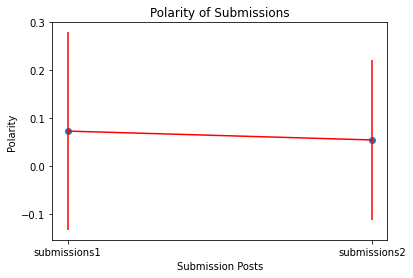

In [15]:
y_error = submission_data_polarity["std"]#[submission_data_polarity["25%"], submission_data_polarity["75%"]]
plt.scatter(submission_data_polarity.index, submission_data_polarity["mean"])
plt.errorbar(submission_data_polarity.index, submission_data_polarity["mean"], yerr=y_error, fmt="r")

plt.title("Polarity of Submissions")
plt.xlabel("Submission Posts")
plt.ylabel("Polarity")

plt.show()